# Computational Tools for Macroeconometrics -   Assignment One

shape of data (781, 127)
1. ADF :  -2.1955732390658222
2. P-value :  0.20785603714684453
3. Num of lags :  20
4. Num of obs used for ADF regression and critical values calculation : 760
5. Critical Values :
/t 1% : -3.4389835846902788
/t 5% : -2.8653504478604757
/t 10% : -2.5687990737534627
1. ADF :  1.964500478363843
2. P-value :  0.9986250089956475
3. Num of lags :  15
4. Num of obs used for ADF regression and critical values calculation : 765
5. Critical Values :
/t 1% : -3.438926964986094
/t 5% : -2.8653254941943174
/t 10% : -2.5687857802554572
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=618.765, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=746.054, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=643.598, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=615.126, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=744.086, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=616.653, Time=0.13 sec
 ARIMA(0,1,2

<Axes: xlabel='sasdate'>

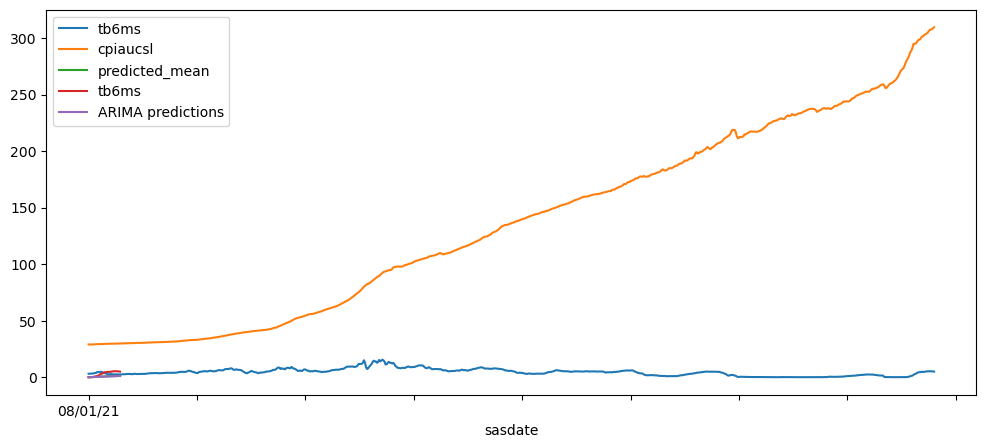

In [2]:
import pandas as pd
from numpy.linalg import solve
import numpy as np
import matplotlib.pyplot as plt
import os as os
# Load the dataset
df = pd.read_stata("dataset.dta", index_col='sasdate')
print('shape of data', df.shape)
df.head()

# Plot the time series of teasury bill of 6 months from 01/01/1957 to 05/01/2017

df['tb6ms'].plot(figsize=(12,5),legend=True)

# Explanation:
# In this section we analyse the 6 months TB time series using the FED data in the public domain. The data visualized in the graph spans from the year 01/01/1957 to 05/01/2017.
# We adopted 8 years interval
# The graph shows non-stationarity (seasoality) with highest peak in aorund 01/01/1984
# The up-trending and detrending of interest rate could be due to market failure or price shock i.e. market speculation in the economy.
# There is also a relative deviation in interest rate overtime i.e. there is high peaks during expansionary period and lower trough during recession (contractionary period).
# The seasonality reveals a clear pattern that repeats itself yearly, suggesting that there are factors that cause interest rate (tb6ms) to rise and fall in a specific time over the years. 

# Plot the time series of inflation (CPI) from 01/01/1957 to 05/01/2017

df['cpiaucsl'].plot(figsize=(12,5),legend=True)

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

def ad_test(df):
    dftest = adfuller(df, autolag = 'AIC')
    print('1. ADF : ', dftest[0])
    print('2. P-value : ', dftest[1])
    print('3. Num of lags : ', dftest[2])
    print('4. Num of obs used for ADF regression and critical values calculation :', dftest[3])
    print('5. Critical Values :')
    for key, val in dftest[4].items():
        print('/t',key, ':', val)
        
# Test statistical signifcant of interest rate (tb6ms )
# Testing whether the series is statationary or not.
ad_test(df['tb6ms'])

# Explanation
# Given the P-value = 0.21 i.e. > .05, this indcates a non-stationarity of the series

# Test statistical signifcant of inflation (CPI)
# Testing whether the series is stationary or non-stationary
ad_test(df['cpiaucsl'])

# Set the order for the ARIMA Model
from pmdarima import auto_arima

# Don't consider the harmless warnings

import warnings
warnings.filterwarnings('ignore')

stepwise_fit = auto_arima(df['tb6ms'], trace=True, 
                         suppress_warnings=True)
stepwise_fit.summary()
# Minimum AIC = 613.144
# Best model ARIMA of order (0,1,1)
# No Seasonality: (0,0,0)

# Split data into traning and Testing phase  

from statsmodels.tsa.arima.model import ARIMA
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape, test.shape)

# Train the data
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['tb6ms'],order=(1,0,5))
model=model.fit()
model.summary()

# Make prediction on the Testset
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)

# Giving the index as sasdate
pred.index=df.index[start:end+1]
print(pred)

pred.plot(legend=True)
test['tb6ms'].plot(legend=True)

test['tb6ms'].mean()

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['tb6ms']))
print(rmse)

# The model is not good because the RMSE is in a close range with  the mean of the dataset

model2=ARIMA(df['tb6ms'], order=(1,0,5))
model2=model2.fit()
df.tail()

# Further analysis fo the data

index_F_dates=pd.date_range(start='1957-01-01', end='2015-01-01')

pred2=model.predict(start=start,end=end,type='levels').rename('ARIMA predictions')

pred2.index=df.index[start:end+1]
print(pred2)

pred2.plot(figsize=(12,5), legend=True)


